<a href="https://colab.research.google.com/github/Meghanah97/netflix__unsupervised/blob/main/Netflix_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size="+3" color='#053c96'><b><u> Project Title : Netflix and TV shows clustering </u></b></font>

# **Project type**: Unsupervised
# **Contribution**: Individual
# **Project by**: Meghana H

# **Project Summary -**

# **Problem statement -**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.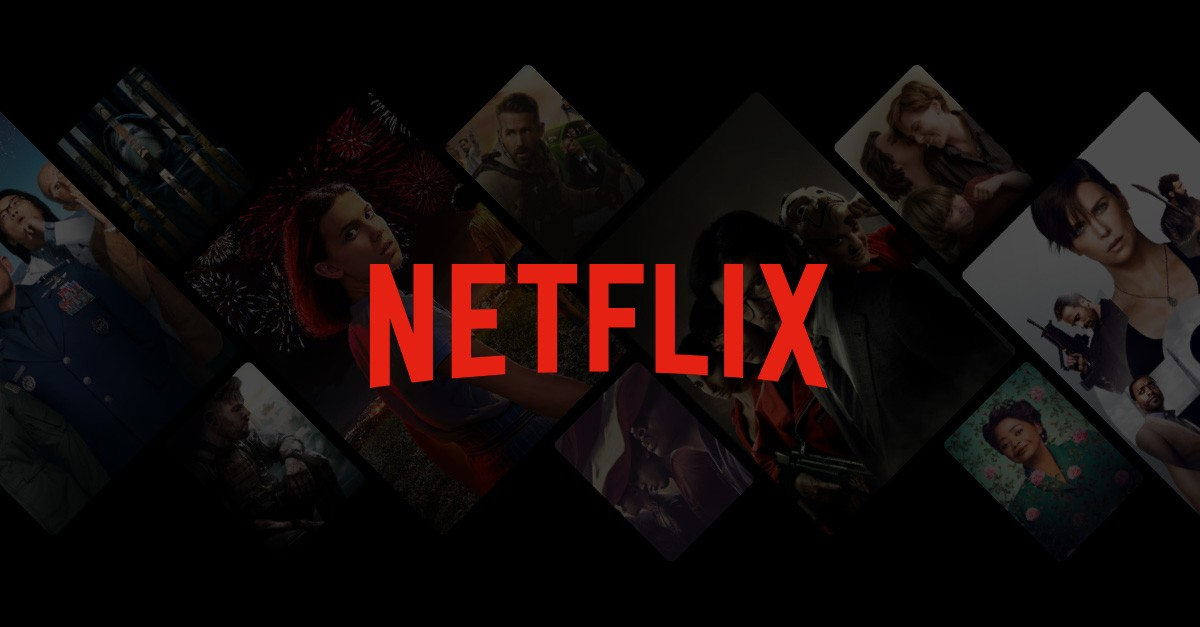

---
**DATASET**:  
NETFLIX MOVIES AND TV SHOWS CLUSTERING


---
Netflix movies and TV shows clustering is a data analysis and machine learning technique that Netflix uses to group its content into similar categories. This technique involves analyzing the various characteristics of each title, such as genre, cast, and plot, and using algorithms to identify patterns and similarities.
In this way, Netflix can provide its users with personalized recommendations based on their viewing history and preferences. The goal is to improve user engagement and satisfaction, leading to increased retention and company revenue.
1)There are about 70% movies and 30% TV shows on Netflix.

2)Data set contains 7787 rows and 12 columns in that cast and director features contains large number of missing values so we can drop it and we have 10 features for the further implementation

3)The United States has the highest number of content on Netflix by a huge margin followed by India.

4)Raul Campos and Jan Sulter collectively have directed the most content on Netflix.

5)Anupam Kher has acted in the highest number of films on Netflix. Drama is the most popular genre followed by comedy.

6)More of the content is released in holiday season - October, November, December and January.

7)The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.


# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

**Data Collection:**
Gather data about Netflix movies and TV shows. This could include information such as titles, genres, release years, ratings, descriptions, and cast/crew members. You might consider using the Netflix API or web scraping techniques to collect this data.

**Data Preprocessing:**
Clean and preprocess the data. This involves handling missing values, removing duplicates, and converting categorical variables (like genres) into numerical representations (one-hot encoding).

**Feature Extraction:**
Transform the data into a format suitable for clustering. You can use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) for textual data (like descriptions), and standardize numerical features.

**Clustering Algorithms:**
Choose a clustering algorithm. K-means and hierarchical clustering are common choices. You might also explore more advanced methods like DBSCAN or t-SNE for dimensionality reduction before clustering.

**Model Training:**
Apply the chosen clustering algorithm to the preprocessed data. Determine the optimal number of clusters based on metrics like the elbow method, silhouette score, or domain knowledge.

**Visualization:**
Visualize the clustered data. PCA (Principal Component Analysis) or t-SNE can help reduce dimensions for visualization purposes. You can use libraries like Matplotlib or Seaborn to create scatter plots or other visualizations.

**Interactivity (Optional):**
If you want to create a user-friendly interface, you can use tools like Flask for a web-based UI or a Jupyter Notebook for an interactive notebook.

**Evaluation:**
Evaluate the quality of your clusters using appropriate metrics, such as intra-cluster similarity and inter-cluster dissimilarity.

**Refinement:**
Fine-tune your program based on the evaluation results. Adjust parameters, try different clustering algorithms, or consider including additional features.

**Deployment:**
Once you're satisfied with your clustering program, deploy it to a server or make it accessible to users.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

Here we have imported some of the necessary libraries we’ll use in this project.

### Dataset Loading

In [ ]:
#mounting on drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
netflix = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df = netflix.copy()

### Dataset First View

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

### Dataset Rows & Columns count

In [ ]:
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

### Dataset Information

In [ ]:
df.info()

#### Duplicate Values

In [ ]:
# Checking Duplicate Values
value = len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

In [ ]:
# Visualizing the missing value
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(),cbar=True)
plt.show()

After doing several traditional steps like checking the first five rows of our data and checking for duplicated and null values, we were able to find out the following:

* Our dataset has 7,787 observations and 12 features\
* There are no duplicated values in our dataset\
* There are null values in some of the features in our dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all').T

### Variables Description

### <b>Attribute Information: </b>
* ***Show_id*** : Unique ID for every Movie / Tv Show

* ***Type*** : Identifier - A Movie or TV Show

* ***Title*** : Title of the Movie / Tv Show

* ***Director***  : Director of the Movie

* ***Cast*** : Actors involved in the movie / show

* ***Country*** : Country where the movie / show was produced

* ***Date_added*** : Date it was added on Netflix

* ***Release_year*** : Actual Releaseyear of the movie / show

* ***Rating*** : TV Rating of the movie / show

* ***Duration*** : Total Duration - in minutes or number of seasons

* ***Listed_in*** : Genere

* ***Description***: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

## 3. ***Data Wrangling***

handling null values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

In [ ]:
df['date_added'].value_counts()

In [ ]:
df['rating'].value_counts()

In [ ]:
df['country'].value_counts()

* since date_added,rating has less percentage of null value ,we can drop observation.
* we cannot drop director and cast as they have high percentage of null values, instead we can replace them with 'unknown'.

In [ ]:
#replacing null value with unknown
df[['director','cast']]=df[['director','cast']].fillna('Unknown')
#replacing null value with mode
df['country']=df['country'].fillna(df['country'].mode()[0])
#dropping remaining null values in dateadded and rating columns
df.dropna(axis=0,inplace=True)

In [ ]:
# rechecking Missing Values/Null Values Count
print(df.isnull().sum())

Handling nested columns i.e., director, casr, listed in and country

In [ ]:
df_new=df.copy()

In [ ]:
dir_constraint=df['director'].apply(lambda x: str(x).split(",")).tolist()
df1=pd.DataFrame(dir_constraint,index=df['title'])
df1=df1.stack()
df1=pd.DataFrame(df1.reset_index())
df1.rename(columns={0: 'Directors'},inplace =True)
df1=df1.drop(['level_1'],axis=1)
df1.sample(10)

In [ ]:
cast_constraint=df['cast'].apply(lambda x: str(x).split(",")).tolist()
df2=pd.DataFrame(cast_constraint,index=df['title'])
df2=df2.stack()
df2=pd.DataFrame(df2.reset_index())
df2.rename(columns={0: 'Actors'},inplace =True)
df2=df2.drop(['level_1'],axis=1)
df2.sample(10)

In [ ]:
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(",")).tolist()
df3=pd.DataFrame(listed_constraint,index=df['title'])
df3=df3.stack()
df3=pd.DataFrame(df3.reset_index())
df3.rename(columns={0: 'Genre'},inplace =True)
df3=df3.drop(['level_1'],axis=1)
df3.sample(10)

In [ ]:
country_constraint=df['country'].apply(lambda x: str(x).split(",")).tolist()
df4=pd.DataFrame(country_constraint,index=df['title'])
df4=df4.stack()
df4=pd.DataFrame(df4.reset_index())
df4.rename(columns={0: 'Country'},inplace =True)
df4=df4.drop(['level_1'],axis=1)
df4.sample(10)

In [ ]:
#merging all nested dataframe
df5=df2.merge(df1,on=['title'],how='inner')
df6=df5.merge(df3,on=['title'],how='inner')
df7=df6.merge(df4,on=['title'],how='inner')
df7.head()

lets merge this dataframe with the original to avoid    information loss

In [ ]:
df=df7.merge(df[['type','title','date_added','release_year','duration','rating','description']],on=['title'],how='left')
df.head()

In [ ]:
df.columns

In [ ]:
#typecasting duration into integer by removing 'min' and 'season' from end
df['duration']=df['duration'].apply(lambda x: int (x.split()[0]))

In [ ]:
#typecasting strimg obj to datetime object of date_added column
df["date_added"]=pd.to_datetime(df['date_added'])
#Extracting date,day,month and year from date_added column
df['day_added']=df['date_added'].dt.day
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
#dropping date_added column
df.drop('date_added',axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
# On the basis of description of rating ,assinging rating according to age_groups
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

df['rating'].replace(ratings_ages,inplace=True)
df['rating'].unique()

In [ ]:
df.head()

In [ ]:
# Separating dataframe on the basis of type of show
movies_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']
print(movies_df.shape,tv_df.shape)

In [ ]:
df.head()

### What all manipulations have you done and insights you found?

* In this section we have treated nul values like director and cast to 'Unknown' and country to mode
* Unnested some attributes like director,cast,listed_in,country
* Typecasted duration to integer,date_added to datetime, extracted date,month,year from date_added.
* Reduced rating column to user understable way.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#EDA

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.

In [ ]:
# Create a pie chart for Type.
colors = ['red', 'blue']
labels = ['Tv Show', 'Movie']
tv_show = df.type.value_counts().loc['TV Show']  # Corrected indexing
movie = df.type.value_counts().loc['Movie']  # Corrected indexing

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",
    title_x=0.5,
    legend=dict(x=0.9),
    height=500,
    width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show()


##Observation
it shows movie content are more compared to tv shows

In [ ]:
# Top 10 casts in Movies and TV Shows
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((movies_df, 'Movies',0),(tv_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='Set1')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

In [ ]:
# Top 10 Directors in Movies and TV Shows
plt.figure(figsize=(23,8))
for i,j,k in ((movies_df, 'Movies',0),(tv_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

In [ ]:
df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

In [ ]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=df['Country'],order=df['Country'].value_counts().index[0:15],hue=df['type'],palette ="Set1")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(20,8))
for i,j,k in ((movies_df, 'Movies',0),(tv_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Country",x = 'title', data = df_country, palette='Set1')
  plt.title(f'Top 10 countries launching {j} back to back')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

In [ ]:
plt.figure(figsize=(23,8))
df_genre = df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize=(23,8))
for i,j,k in ((movies_df, 'Movies',0),(tv_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
for i,j,k in ((movies_df, 'Movies',0),(tv_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

plt.figure(figsize=(20,6))
for i,j,k in ((movies_df, 'Movies',0),(tv_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

In [ ]:
plt.figure(figsize=(23,8))
for i,j,k in ((movies_df, 'Movies',0),(tv_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

In [ ]:
plt.figure(figsize=(23,8))
for i,j,k in ((movies_df, 'Movies',0),(tv_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_day = i.groupby(['day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['day_added'],ascending=False)
  plots= sns.barplot(x = 'day_added',y='title', data = df_day, palette='husl')
  plt.title(f'{j} added added to Netflix by day')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=12, xytext=(0, 8),
                    textcoords='offset points', rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['day_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
plots= sns.distplot(movies_df['duration'],kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=7, xytext=(0, 5),
                  textcoords='offset points', rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(23,8))
df_duration = tv_df.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='husl')
plt.title(f'Barplot of TV Shows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=12, xytext=(0, 8),
                  textcoords='offset points', rotation=90)
plt.show()

In [ ]:
df.columns

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('Country')[['Country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['Country']


df_heatmap = df.loc[df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'],df_heatmap['rating'],normalize = "index").T
df_heatmap

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix\
The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

**Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

**Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(tv_df['Country'].str.contains('United States')) / len(tv_df)
movie_proportion = np.sum(movies_df['Country'].str.contains('United States')) / len(movies_df)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(tv_df)), int(movie_proportion * len(movies_df))]
nobs = [len(tv_df), len(movies_df)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


We conclude that the proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.\
We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df.isna().sum()

### 2. Handling Outliers

In [ ]:
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

In [ ]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) | ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [ ]:
release_year_outliers

In [ ]:
#15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

In [ ]:
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)\
*Modelling Approach:*

*   Select the attributes based on which you want to cluster the shows
*   Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase
*   Lemmatization to generate a meaningful word out of corpus of words
*   Tokenization of corpus
*   Word vectorization
*   Dimensionality reduction
*   Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques**
*   Build an optimal number of clusters and visualise the contents of each cluster using word clouds

In [ ]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

In [ ]:
# Binning of rating in new dataframe
df_new['rating'].replace(ratings_ages, inplace = True)

# Checking sample after binning
df_new.sample(2)

In [ ]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

#### Removing non-ASCII character

In [ ]:
import unicodedata
# function to remove non-ascii characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df_new['content_detail'] = remove_non_ascii(df['content_detail'])
df_new['content_detail'][50]

### Remove stopwords and lower case:

In [ ]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

#### Remove punctuations

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

####Removing URLs & Removing words and digits contain digits.

In [ ]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

In [ ]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

In [ ]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

In [ ]:
df_new['content_detail'][0]

#### Lemmatization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

#### Tokenization

In [ ]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

#### Part of speech tagging

In [ ]:
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

#### Vectorization:

In [ ]:
# Drop rows with missing 'content_detail' values
df_new = df_new.dropna(subset=['content_detail'])

# Convert 'content_detail' column to strings
df_new['content_detail'] = df_new['content_detail'].astype(str)

# Create an instance of TfidfVectorizer
tfidfv = TfidfVectorizer(max_features=30000)

# Fitting and transforming the data using TfidfVectorizer
x = tfidfv.fit_transform(df_new['content_detail'])

# Checking the shape of the formed document matrix
print(x.shape)

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

#### Dimensionality reduction using PCA:

In [ ]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***7. ML Model Implementation***

## **Futue Work**
From this clustering analysis we can create Netflix movies and tv shows recommendation system & also we can use topic modeling.
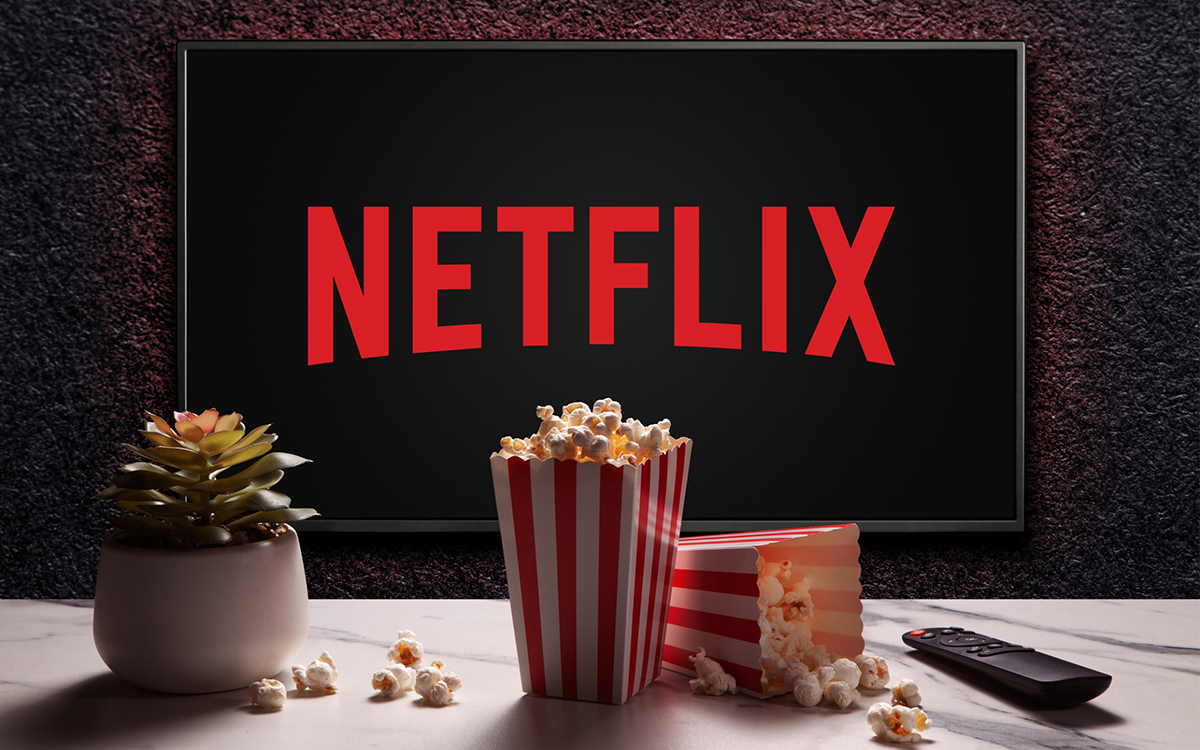

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***